# Masking out the solar disk

- https://docs.sunpy.org/en/stable/generated/gallery/computer_vision_techniques/mask_disk.html

How to mask out all emission from the solar disk.

In [ ]:
import matplotlib.pyplot as plt

import sunpy.map
from sunpy.data.sample import AIA_171_IMAGE
from sunpy.map.maputils import all_coordinates_from_map, coordinate_is_on_solar_disk

We start with the sample data.

In [ ]:
aia = sunpy.map.Map(AIA_171_IMAGE)

A utility function gives us access to the helioprojective coordinate of each
pixels. We can use that to create a new array of all the coordinates
that are on the solar disk.

In [ ]:
hpc_coords = all_coordinates_from_map(aia)

Now, we can create a mask from the coordinates by using another utility
function that gives us a mask that has `True` for those coordinates that are
on the solar disk. We also make a slight change to the colormap so that
masked values are shown as black instead of the default white.

In [ ]:
mask = coordinate_is_on_solar_disk(hpc_coords)
mask.shape

(1024, 1024)

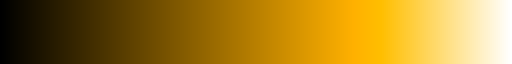

In [ ]:
palette = aia.cmap.copy()
palette

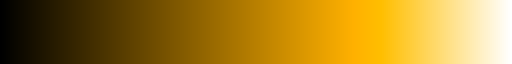

In [ ]:
palette.set_bad('black')
palette

Finally we create a new map with our new mask.

In [ ]:
scaled_map = sunpy.map.Map(aia.data, aia.meta, mask=mask)

Let's plot the results using our modified colormap.

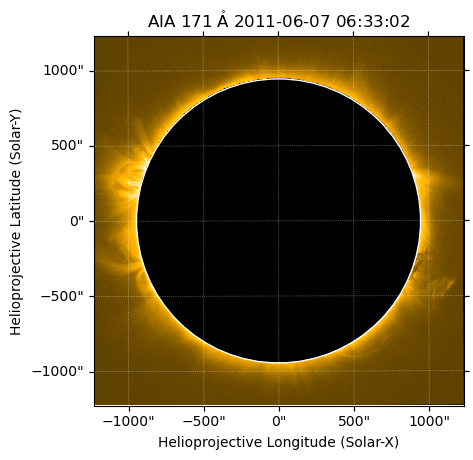

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=scaled_map)
scaled_map.plot(axes=ax, cmap=palette)
scaled_map.draw_limb(axes=ax)
plt.show()